In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def read_bottleneck_data(csv_path):    
    
    ### Loop the data lines
    with open(csv_path, 'r') as temp_f:
    # get No of columns in each line
        col = [ len(l.split(",")) for l in temp_f.readlines() ]

    ### Generate column names  (names will be Bres1, Bres2, ... for the trailing 'Bottleneck Residue' columns)
    column_names = ['Snapshot', 'Tunnel cluster', 'Tunnel', 'Throughput', 'Cost', 'x', 'y', 'z', 'Bottleneck radius']
    for i in range(9, max(col)):
            column_names.append("Bres" + str(i-8))

    ### Read csv
    df = pd.read_csv(csv_path, header=None, delimiter=",", names=column_names, skiprows=2)

    return df

In [3]:
def extract_bradii(df, tun_cl):
    """Return a filtered df of 'Bottleneck radius' for a given tunnel cluster"""
    return df[df['Tunnel cluster'] == tun_cl][['Bottleneck radius']]


def extract_bres(df, tun_cl):
    """Return a filtered df of all 'Bres' columns for a given tunnel cluster"""
    bres_cols = []
    for i in range(9, len(df.columns)):
            bres_cols.append("Bres" + str(i-8))

    return df[df['Tunnel cluster'] == tun_cl][bres_cols]


def make_dict_BR(df_Bres):
    """Returns dictionary of all bottleneck residues, where key is the residue and value is frame frequency"""
    df_BR_col = df_Bres.melt(value_name='resid')

    bott_res_series = pd.Series(df_BR_col['resid'])
    bott_res_series.dropna(inplace=True)
    int_BR_list = [int(i) for i in bott_res_series]

    dict_BR = dict()

    for elem in int_BR_list:
        if elem in dict_BR:
            dict_BR[elem] += 1
        else:
            dict_BR[elem] = 1
    return dict_BR


def top_most_frequent_BR(BR_dict):
    """Returns dictionary (where keys=residue# and values=frequency) of top 10 bottleneck residues appearing in the most frames from a given dictionary of BR values"""
    dict_top_BR = {}
    list_inverted_dict_sorted = []
    i = 0
    for key, val in BR_dict.items():
        list_inverted_dict_sorted.append((val, key))
    list_inverted_dict_sorted.sort(reverse=True)
    
    while i < 10:
        dict_top_BR[list_inverted_dict_sorted[i][1]] = list_inverted_dict_sorted[i][0]
        i += 1
    return dict_top_BR

In [4]:
def combine_bres_reps(r1, r2, r3):
    r1_2 = r1
    r1_2_3 = r1_2

    for key, val in r2.items():
        if key in r1_2.keys():
            r1_2[key] += val
        else:
            r1_2[key] = val

    for key, val in r3.items():
        if key in r1_2_3.keys():
            r1_2_3[key] += val
        else:
            r1_2_3[key] = val

    return r1_2_3


def sorted_BR(BR_dict):
    """Returns list of top 10 bottleneck residues appearing in the most frames from a given 
    dictionary of BR values"""
    list_top_BR = []
    list_top_BR_frequencies = []
    list_inverted_dict_sorted = []
    i = 0
    for key, val in BR_dict.items():
        list_inverted_dict_sorted.append((val, key))
    list_inverted_dict_sorted.sort(reverse=True)
    
    while i < 10:
        list_top_BR.append(list_inverted_dict_sorted[i][1])
        list_top_BR_frequencies.append(list_inverted_dict_sorted[i][0])
        i += 1
    return list_top_BR #, list_top_BR_frequencies

In [5]:
from convert_num import convert_list_inverse

1420


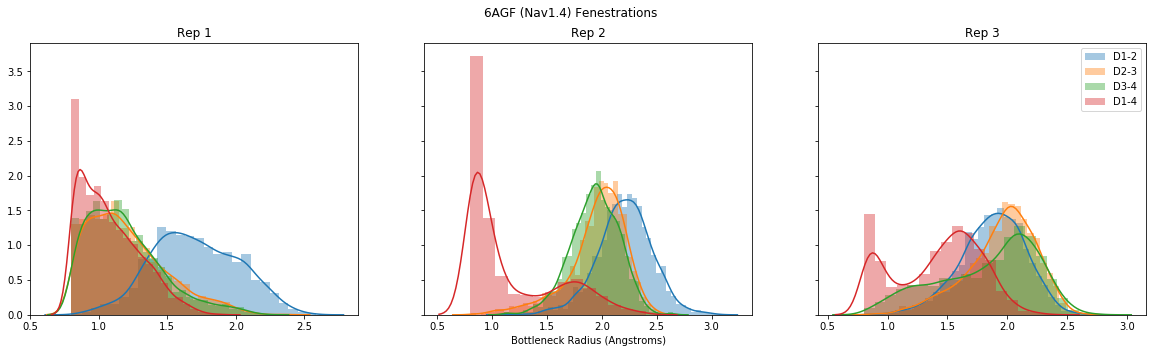

In [10]:
df_6agf_1 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6AGF_WTR_rep_1/out/analysis/bottlenecks.csv")
df_6agf_2 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6AGF_WTR_rep_2/out/analysis/bottlenecks.csv")
df_6agf_3 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6AGF_WTR_rep_3/out/analysis/bottlenecks.csv")

df_6agf_1_f1 = extract_bradii(df_6agf_1, 1)
df_6agf_1_f2 = extract_bradii(df_6agf_1, 2)
df_6agf_1_f3 = extract_bradii(df_6agf_1, 5)
df_6agf_1_f4 = extract_bradii(df_6agf_1, 6)

df_6agf_2_f1 = extract_bradii(df_6agf_2, 1)
df_6agf_2_f2 = extract_bradii(df_6agf_2, 2)
df_6agf_2_f3 = extract_bradii(df_6agf_2, 3)
df_6agf_2_f4 = extract_bradii(df_6agf_2, 6)

df_6agf_3_f1 = extract_bradii(df_6agf_3, 2)
df_6agf_3_f2 = extract_bradii(df_6agf_3, 1)
df_6agf_3_f3 = extract_bradii(df_6agf_3, 3)
df_6agf_3_f4 = extract_bradii(df_6agf_3, 6)


fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('6AGF (Nav1.4) Fenestrations')

sns.distplot(df_6agf_1_f1, ax=axes[0], label='D1-2')
sns.distplot(df_6agf_1_f2, ax=axes[0], label='D2-3')
sns.distplot(df_6agf_1_f3, ax=axes[0], label='D3-4')
sns.distplot(df_6agf_1_f4, ax=axes[0], label='D1-4')
axes[0].set_title("Rep 1")

sns.distplot(df_6agf_2_f1, ax=axes[1], label='D1-2', axlabel='Bottleneck Radius (Angstroms)')
sns.distplot(df_6agf_2_f2, ax=axes[1], label='D2-3')
sns.distplot(df_6agf_2_f3, ax=axes[1], label='D3-4')
sns.distplot(df_6agf_2_f4, ax=axes[1], label='D1-4')
axes[1].set_title("Rep 2")

sns.distplot(df_6agf_3_f1, ax=axes[2], label='D1-2')
sns.distplot(df_6agf_3_f2, ax=axes[2], label='D2-3')
sns.distplot(df_6agf_3_f3, ax=axes[2], label='D3-4')
sns.distplot(df_6agf_3_f4, ax=axes[2], label='D1-4')
axes[2].set_title("Rep 3")

plt.legend()

In [1]:
bres_6agf_1_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_1, 1)))
bres_6agf_2_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_2, 1)))
bres_6agf_3_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_3, 2)))

bres_6agf_1_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_1, 2)))
bres_6agf_2_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_2, 2)))
bres_6agf_3_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_3, 1)))

bres_6agf_1_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_1, 5)))
bres_6agf_2_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_2, 3)))
bres_6agf_3_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_3, 3)))

bres_6agf_1_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_1, 6)))
bres_6agf_2_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_2, 6)))
bres_6agf_3_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6agf_3, 6)))


print(combine_bres_reps(bres_6agf_1_f1, bres_6agf_2_f1, bres_6agf_3_f1))
print(sorted_BR(combine_bres_reps(bres_6agf_1_f1, bres_6agf_2_f1, bres_6agf_3_f1)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6agf_1_f1, bres_6agf_2_f1, bres_6agf_3_f1)), "6AGF"))
print("\n")
print(combine_bres_reps(bres_6agf_1_f2, bres_6agf_2_f2, bres_6agf_3_f2))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6agf_1_f2, bres_6agf_2_f2, bres_6agf_3_f2)), "6AGF"))
print("\n")
print(combine_bres_reps(bres_6agf_1_f3, bres_6agf_2_f3, bres_6agf_3_f3))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6agf_1_f3, bres_6agf_2_f3, bres_6agf_3_f3)), "6AGF"))
print("\n")
print(combine_bres_reps(bres_6agf_1_f4, bres_6agf_2_f4, bres_6agf_3_f4))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6agf_1_f4, bres_6agf_2_f4, bres_6agf_3_f4)), "6AGF"))
print("\n")

NameError: name 'top_most_frequent_BR' is not defined

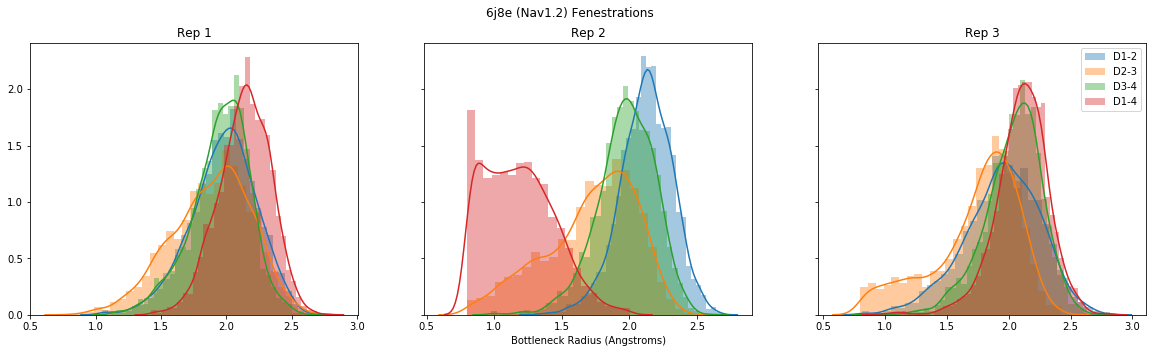

In [13]:
df_6j8e_1 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8E_WTR_rep_1/out/analysis/bottlenecks.csv")
df_6j8e_2 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8E_WTR_rep_2/out/analysis/bottlenecks.csv")
df_6j8e_3 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8E_WTR_rep_3/out/analysis/bottlenecks.csv")

### CHANGE TUN_CL#                       !
df_6j8e_1_f1 = extract_bradii(df_6j8e_1, 2)
df_6j8e_1_f2 = extract_bradii(df_6j8e_1, 3)
df_6j8e_1_f3 = extract_bradii(df_6j8e_1, 4)
df_6j8e_1_f4 = extract_bradii(df_6j8e_1, 1)

df_6j8e_2_f1 = extract_bradii(df_6j8e_2, 1)
df_6j8e_2_f2 = extract_bradii(df_6j8e_2, 3)
df_6j8e_2_f3 = extract_bradii(df_6j8e_2, 2)
df_6j8e_2_f4 = extract_bradii(df_6j8e_2, 6)

df_6j8e_3_f1 = extract_bradii(df_6j8e_3, 3)
df_6j8e_3_f2 = extract_bradii(df_6j8e_3, 4)
df_6j8e_3_f3 = extract_bradii(df_6j8e_3, 2)
df_6j8e_3_f4 = extract_bradii(df_6j8e_3, 1)


fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('6j8e (Nav1.2) Fenestrations')

sns.distplot(df_6j8e_1_f1, ax=axes[0], label='D1-2')
sns.distplot(df_6j8e_1_f2, ax=axes[0], label='D2-3')
sns.distplot(df_6j8e_1_f3, ax=axes[0], label='D3-4')
sns.distplot(df_6j8e_1_f4, ax=axes[0], label='D1-4')
axes[0].set_title("Rep 1")

sns.distplot(df_6j8e_2_f1, ax=axes[1], label='D1-2', axlabel='Bottleneck Radius (Angstroms)')
sns.distplot(df_6j8e_2_f2, ax=axes[1], label='D2-3')
sns.distplot(df_6j8e_2_f3, ax=axes[1], label='D3-4')
sns.distplot(df_6j8e_2_f4, ax=axes[1], label='D1-4')
axes[1].set_title("Rep 2")

sns.distplot(df_6j8e_3_f1, ax=axes[2], label='D1-2')
sns.distplot(df_6j8e_3_f2, ax=axes[2], label='D2-3')
sns.distplot(df_6j8e_3_f3, ax=axes[2], label='D3-4')
sns.distplot(df_6j8e_3_f4, ax=axes[2], label='D1-4')
axes[2].set_title("Rep 3")

plt.legend()

In [25]:
def add_one(l):
    new_l = []
    for i in l:
        new_l.append(i + 1)
    return new_l

bres_6j8e_1_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_1, 2)))
bres_6j8e_2_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_2, 1)))
bres_6j8e_3_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_3, 3)))

bres_6j8e_1_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_1, 3)))
bres_6j8e_2_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_2, 3)))
bres_6j8e_3_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_3, 4)))

bres_6j8e_1_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_1, 4)))
bres_6j8e_2_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_2, 2)))
bres_6j8e_3_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_3, 2)))

bres_6j8e_1_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_1, 1)))
bres_6j8e_2_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_2, 6)))
bres_6j8e_3_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8e_3, 1)))


print(combine_bres_reps(bres_6j8e_1_f1, bres_6j8e_2_f1, bres_6j8e_3_f1))
print(sorted_BR(combine_bres_reps(bres_6j8e_1_f1, bres_6j8e_2_f1, bres_6j8e_3_f1)))
print(add_one(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8e_1_f1, bres_6j8e_2_f1, bres_6j8e_3_f1)), "6J8E")))
print("\n")
print(combine_bres_reps(bres_6j8e_1_f2, bres_6j8e_2_f2, bres_6j8e_3_f2))
print(sorted_BR(combine_bres_reps(bres_6j8e_1_f2, bres_6j8e_2_f2, bres_6j8e_3_f2)))
print(add_one(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8e_1_f2, bres_6j8e_2_f2, bres_6j8e_3_f2)), "6J8E")))
print("\n")
print(combine_bres_reps(bres_6j8e_1_f3, bres_6j8e_2_f3, bres_6j8e_3_f3))
print(sorted_BR(combine_bres_reps(bres_6j8e_1_f3, bres_6j8e_2_f3, bres_6j8e_3_f3)))
print(add_one(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8e_1_f3, bres_6j8e_2_f3, bres_6j8e_3_f3)), "6J8E")))
print("\n")
print(combine_bres_reps(bres_6j8e_1_f4, bres_6j8e_2_f4, bres_6j8e_3_f4))
print(sorted_BR(combine_bres_reps(bres_6j8e_1_f4, bres_6j8e_2_f4, bres_6j8e_3_f4)))
print(add_one(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8e_1_f4, bres_6j8e_2_f4, bres_6j8e_3_f4)), "6J8E")))
print("\n")

{272: 5819, 524: 6660, 139: 1544, 236: 5518, 237: 6083, 238: 1111, 525: 3365, 528: 5931, 529: 1635, 498: 691, 275: 6359, 532: 5296, 233: 4488}
[524, 275, 237, 528, 272, 236, 532, 233, 525, 529]
[968, 421, 383, 972, 418, 382, 976, 379, 969, 973]


{816: 5765, 449: 2059, 811: 4808, 812: 4896, 493: 4739, 775: 1204, 496: 6435, 497: 4302, 498: 1735, 531: 6892, 534: 1114, 445: 4020}
[531, 496, 816, 811, 493, 812, 497, 445, 498, 449]
[975, 940, 1463, 1458, 937, 941, 1459, 889, 942, 1422]


{770: 5937, 773: 5938, 774: 5881, 775: 706, 1067: 2963, 815: 884, 819: 5832, 702: 3528, 822: 471, 1114: 4846, 1115: 3197, 1118: 5937}
[770, 773, 1118, 774, 819, 1114, 702, 1115, 1067, 815]
[1417, 1420, 1765, 1466, 1421, 1761, 1349, 1762, 1714, 1462]


{1121: 6618, 1124: 1065, 1125: 5566, 1062: 1346, 264: 6070, 1065: 6708, 1066: 6789, 1067: 3067, 268: 3304, 269: 6495, 238: 5439, 1021: 2015, 1118: 1019}
[1066, 1065, 1121, 269, 264, 1125, 238, 268, 1067, 1021]
[1713, 1712, 1768, 415, 410, 1772, 384, 1668, 414,

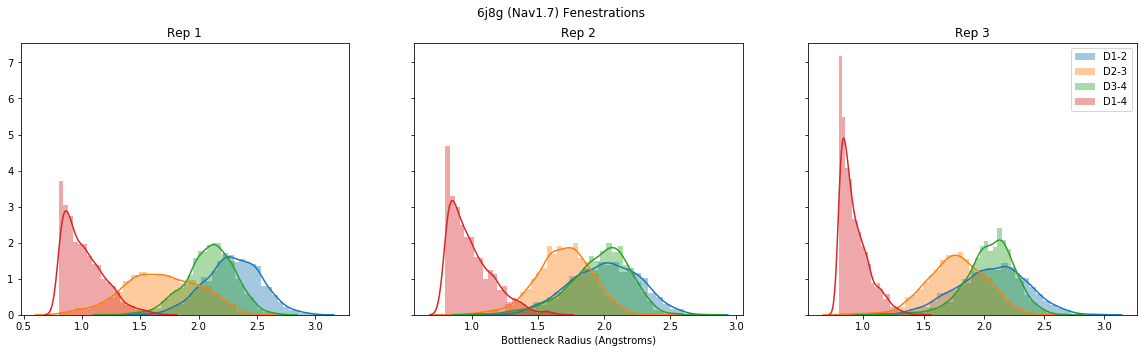

In [19]:
df_6j8g_1 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8G_WTR_rep_1/out/analysis/bottlenecks.csv")
df_6j8g_2 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8G_WTR_rep_2/out/analysis/bottlenecks.csv")
df_6j8g_3 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6J8G_WTR_rep_3/out/analysis/bottlenecks.csv")

### CHANGE TUN_CL#                       !
df_6j8g_1_f1 = extract_bradii(df_6j8g_1, 1)
df_6j8g_1_f2 = extract_bradii(df_6j8g_1, 3)
df_6j8g_1_f3 = extract_bradii(df_6j8g_1, 2)
df_6j8g_1_f4 = extract_bradii(df_6j8g_1, 6)

df_6j8g_2_f1 = extract_bradii(df_6j8g_2, 1)
df_6j8g_2_f2 = extract_bradii(df_6j8g_2, 2)
df_6j8g_2_f3 = extract_bradii(df_6j8g_2, 3)
df_6j8g_2_f4 = extract_bradii(df_6j8g_2, 6)

df_6j8g_3_f1 = extract_bradii(df_6j8g_3, 1)
df_6j8g_3_f2 = extract_bradii(df_6j8g_3, 2)
df_6j8g_3_f3 = extract_bradii(df_6j8g_3, 3)
df_6j8g_3_f4 = extract_bradii(df_6j8g_3, 6)


fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('6j8g (Nav1.7) Fenestrations')

sns.distplot(df_6j8g_1_f1, ax=axes[0], label='D1-2')
sns.distplot(df_6j8g_1_f2, ax=axes[0], label='D2-3')
sns.distplot(df_6j8g_1_f3, ax=axes[0], label='D3-4')
sns.distplot(df_6j8g_1_f4, ax=axes[0], label='D1-4')
axes[0].set_title("Rep 1")

sns.distplot(df_6j8g_2_f1, ax=axes[1], label='D1-2', axlabel='Bottleneck Radius (Angstroms)')
sns.distplot(df_6j8g_2_f2, ax=axes[1], label='D2-3')
sns.distplot(df_6j8g_2_f3, ax=axes[1], label='D3-4')
sns.distplot(df_6j8g_2_f4, ax=axes[1], label='D1-4')
axes[1].set_title("Rep 2")

sns.distplot(df_6j8g_3_f1, ax=axes[2], label='D1-2')
sns.distplot(df_6j8g_3_f2, ax=axes[2], label='D2-3')
sns.distplot(df_6j8g_3_f3, ax=axes[2], label='D3-4')
sns.distplot(df_6j8g_3_f4, ax=axes[2], label='D1-4')
axes[2].set_title("Rep 3")

plt.legend()

In [21]:
bres_6j8g_1_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_1, 1)))
bres_6j8g_2_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_2, 1)))
bres_6j8g_3_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_3, 1)))

bres_6j8g_1_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_1, 3)))
bres_6j8g_2_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_2, 2)))
bres_6j8g_3_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_3, 2)))

bres_6j8g_1_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_1, 2)))
bres_6j8g_2_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_2, 3)))
bres_6j8g_3_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_3, 3)))

bres_6j8g_1_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_1, 6)))
bres_6j8g_2_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_2, 6)))
bres_6j8g_3_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6j8g_3, 6)))


print(combine_bres_reps(bres_6j8g_1_f1, bres_6j8g_2_f1, bres_6j8g_3_f1))
print(sorted_BR(combine_bres_reps(bres_6j8g_1_f1, bres_6j8g_2_f1, bres_6j8g_3_f1)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8g_1_f1, bres_6j8g_2_f1, bres_6j8g_3_f1)), "6J8G"))
print("\n")
print(combine_bres_reps(bres_6j8g_1_f2, bres_6j8g_2_f2, bres_6j8g_3_f2))
print(sorted_BR(combine_bres_reps(bres_6j8g_1_f2, bres_6j8g_2_f2, bres_6j8g_3_f2)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8g_1_f2, bres_6j8g_2_f2, bres_6j8g_3_f2)), "6J8G"))
print("\n")
print(combine_bres_reps(bres_6j8g_1_f3, bres_6j8g_2_f3, bres_6j8g_3_f3))
print(sorted_BR(combine_bres_reps(bres_6j8g_1_f3, bres_6j8g_2_f3, bres_6j8g_3_f3)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8g_1_f3, bres_6j8g_2_f3, bres_6j8g_3_f3)), "6J8G"))
print("\n")
print(combine_bres_reps(bres_6j8g_1_f4, bres_6j8g_2_f4, bres_6j8g_3_f4))
print(sorted_BR(combine_bres_reps(bres_6j8g_1_f4, bres_6j8g_2_f4, bres_6j8g_3_f4)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6j8g_1_f4, bres_6j8g_2_f4, bres_6j8g_3_f4)), "6J8G"))
print("\n")

{139: 2332, 242: 5461, 531: 6855, 532: 4559, 245: 5480, 246: 6500, 535: 6000, 536: 1192, 281: 5886, 539: 5230, 284: 6911}
[284, 531, 246, 535, 281, 242, 539, 245, 532, 139]
[397, 952, 359, 956, 394, 960, 355, 358, 953, 252]


{452: 3037, 456: 1511, 823: 5987, 782: 1926, 818: 5198, 819: 4152, 500: 4617, 503: 6792, 504: 5628, 505: 2790, 538: 7248, 541: 864, 542: 2004}
[538, 503, 823, 504, 818, 500, 819, 505, 542, 782]
[959, 924, 1446, 925, 1441, 921, 926, 1442, 963, 1405]


{1121: 4264, 1122: 3344, 1125: 5701, 777: 6533, 780: 5624, 781: 5440, 782: 761, 1074: 3505, 822: 689, 826: 5477, 702: 796, 709: 5408}
[777, 1125, 780, 709, 826, 781, 1121, 1074, 1122, 702]
[1400, 1748, 1403, 1332, 1449, 1404, 1744, 1697, 1745, 1325]


{1028: 3500, 1073: 4734, 1128: 4692, 1131: 326, 1132: 1827, 1069: 3612, 1072: 4822, 273: 3551, 274: 413, 277: 976, 278: 4932, 247: 1741}
[278, 1072, 1073, 1128, 1069, 273, 1028, 247, 1132, 277]
[391, 1695, 1696, 1751, 1692, 386, 1651, 360, 1755, 390]




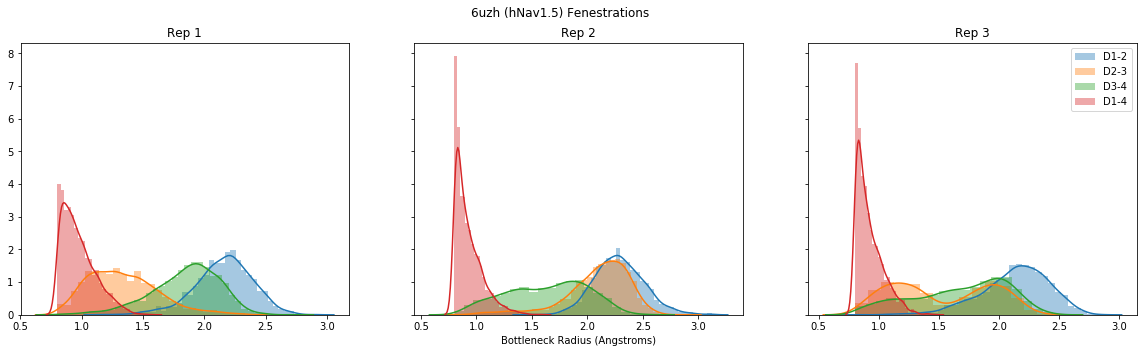

In [22]:
df_6uzh_1 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZH_WTR_rep_1/out/analysis/bottlenecks.csv")
df_6uzh_2 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZH_WTR_rep_2/out/analysis/bottlenecks.csv")
df_6uzh_3 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZH_WTR_rep_3/out/analysis/bottlenecks.csv")

### CHANGE TUN_CL#                       !
df_6uzh_1_f1 = extract_bradii(df_6uzh_1, 1)
df_6uzh_1_f2 = extract_bradii(df_6uzh_1, 4)
df_6uzh_1_f3 = extract_bradii(df_6uzh_1, 2)
df_6uzh_1_f4 = extract_bradii(df_6uzh_1, 5)

df_6uzh_2_f1 = extract_bradii(df_6uzh_2, 1)
df_6uzh_2_f2 = extract_bradii(df_6uzh_2, 2)
df_6uzh_2_f3 = extract_bradii(df_6uzh_2, 4)
df_6uzh_2_f4 = extract_bradii(df_6uzh_2, 7)

df_6uzh_3_f1 = extract_bradii(df_6uzh_3, 1)
df_6uzh_3_f2 = extract_bradii(df_6uzh_3, 3)
df_6uzh_3_f3 = extract_bradii(df_6uzh_3, 2)
df_6uzh_3_f4 = extract_bradii(df_6uzh_3, 6)


fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('6uzh (hNav1.5) Fenestrations')

sns.distplot(df_6uzh_1_f1, ax=axes[0], label='D1-2')
sns.distplot(df_6uzh_1_f2, ax=axes[0], label='D2-3')
sns.distplot(df_6uzh_1_f3, ax=axes[0], label='D3-4')
sns.distplot(df_6uzh_1_f4, ax=axes[0], label='D1-4')
axes[0].set_title("Rep 1")

sns.distplot(df_6uzh_2_f1, ax=axes[1], label='D1-2', axlabel='Bottleneck Radius (Angstroms)')
sns.distplot(df_6uzh_2_f2, ax=axes[1], label='D2-3')
sns.distplot(df_6uzh_2_f3, ax=axes[1], label='D3-4')
sns.distplot(df_6uzh_2_f4, ax=axes[1], label='D1-4')
axes[1].set_title("Rep 2")

sns.distplot(df_6uzh_3_f1, ax=axes[2], label='D1-2')
sns.distplot(df_6uzh_3_f2, ax=axes[2], label='D2-3')
sns.distplot(df_6uzh_3_f3, ax=axes[2], label='D3-4')
sns.distplot(df_6uzh_3_f4, ax=axes[2], label='D1-4')
axes[2].set_title("Rep 3")

plt.legend()

In [24]:
bres_6uzh_1_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_1, 1)))
bres_6uzh_2_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_2, 1)))
bres_6uzh_3_f1 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_3, 1)))

bres_6uzh_1_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_1, 3)))
bres_6uzh_2_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_2, 2)))
bres_6uzh_3_f2 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_3, 2)))

bres_6uzh_1_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_1, 2)))
bres_6uzh_2_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_2, 3)))
bres_6uzh_3_f3 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_3, 3)))

bres_6uzh_1_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_1, 6)))
bres_6uzh_2_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_2, 6)))
bres_6uzh_3_f4 = top_most_frequent_BR(make_dict_BR(extract_bres(df_6uzh_3, 6)))


print(combine_bres_reps(bres_6uzh_1_f1, bres_6uzh_2_f1, bres_6uzh_3_f1))
print(sorted_BR(combine_bres_reps(bres_6uzh_1_f1, bres_6uzh_2_f1, bres_6uzh_3_f1)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6uzh_1_f1, bres_6uzh_2_f1, bres_6uzh_3_f1)), "6UZH"))
print("\n")
print(combine_bres_reps(bres_6uzh_1_f2, bres_6uzh_2_f2, bres_6uzh_3_f2))
print(sorted_BR(combine_bres_reps(bres_6uzh_1_f2, bres_6uzh_2_f2, bres_6uzh_3_f2)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6uzh_1_f2, bres_6uzh_2_f2, bres_6uzh_3_f2)), "6UZH"))
print("\n")
print(combine_bres_reps(bres_6uzh_1_f3, bres_6uzh_2_f3, bres_6uzh_3_f3))
print(sorted_BR(combine_bres_reps(bres_6uzh_1_f3, bres_6uzh_2_f3, bres_6uzh_3_f3)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6uzh_1_f3, bres_6uzh_2_f3, bres_6uzh_3_f3)), "6UZH"))
print("\n")
print(combine_bres_reps(bres_6uzh_1_f4, bres_6uzh_2_f4, bres_6uzh_3_f4))
print(sorted_BR(combine_bres_reps(bres_6uzh_1_f4, bres_6uzh_2_f4, bres_6uzh_3_f4)))
print(convert_list_inverse(sorted_BR(combine_bres_reps(bres_6uzh_1_f4, bres_6uzh_2_f4, bres_6uzh_3_f4)), "6UZH"))
print("\n")

{544: 6134, 288: 5429, 291: 6678, 548: 5685, 292: 2827, 252: 5757, 541: 2516, 137: 1223, 249: 5168, 540: 5628, 253: 6209, 254: 987}
[291, 253, 544, 548, 252, 288, 540, 249, 292, 541]
[409, 371, 930, 934, 406, 370, 926, 367, 410, 927]


{256: 1722, 513: 3996, 514: 3240, 515: 2079, 790: 5566, 785: 1506, 788: 2092, 789: 1993, 512: 2323, 791: 2492, 793: 1350, 547: 2479, 826: 2180, 827: 976, 830: 954, 831: 2427, 834: 2211, 837: 754, 1082: 1450, 1128: 1473, 1129: 1060, 1132: 2236, 253: 1121, 509: 1587, 254: 2311, 255: 2446}
[790, 513, 547, 831, 512, 1132, 834, 514, 826, 788]
[1420, 899, 933, 1461, 898, 1762, 1464, 1456, 1418, 1419]


{256: 2497, 513: 2288, 514: 2018, 515: 2497, 790: 4999, 785: 1481, 788: 2307, 789: 2241, 512: 1219, 791: 2500, 792: 1495, 793: 2184, 547: 2385, 548: 1372, 550: 1185, 551: 1560, 1082: 1812, 831: 2375, 834: 2322, 717: 494, 826: 1070, 1128: 1923, 1129: 1402, 1132: 2354, 509: 840, 254: 1985, 255: 2469}
[790, 791, 515, 256, 255, 547, 831, 513, 793, 514]
[1420, 1421, 

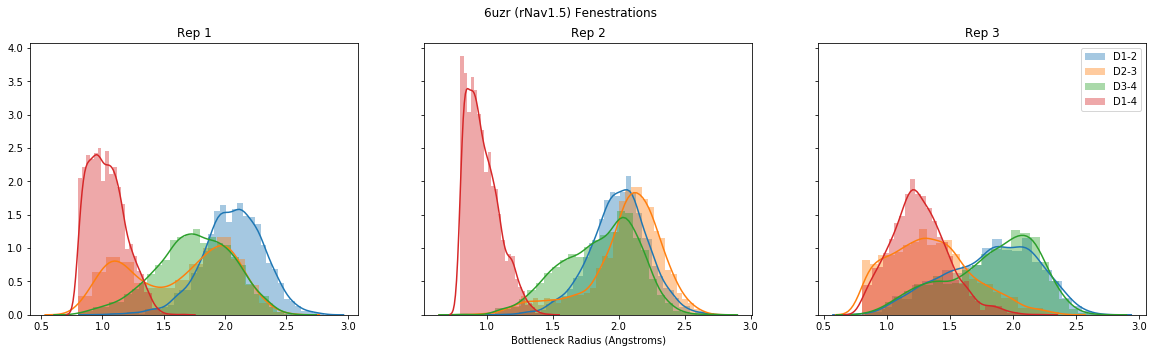

In [7]:
df_6uzr_1 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZR_WTR_rep_1/out/analysis/bottlenecks.csv")
df_6uzr_2 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZR_WTR_rep_2/out/analysis/bottlenecks.csv")
df_6uzr_3 = read_bottleneck_data("/home/elaine/elaine_data/caver_3.0/pdbs_0_250/6UZR_WTR_rep_3/out/analysis/bottlenecks.csv")

### CHANGE TUN_CL#                       !
df_6uzr_1_f1 = extract_bradii(df_6uzr_1, 1)
df_6uzr_1_f2 = extract_bradii(df_6uzr_1, 3)
df_6uzr_1_f3 = extract_bradii(df_6uzr_1, 2)
df_6uzr_1_f4 = extract_bradii(df_6uzr_1, 5)

df_6uzr_2_f1 = extract_bradii(df_6uzr_2, 2)
df_6uzr_2_f2 = extract_bradii(df_6uzr_2, 1)
df_6uzr_2_f3 = extract_bradii(df_6uzr_2, 3)
df_6uzr_2_f4 = extract_bradii(df_6uzr_2, 5)

df_6uzr_3_f1 = extract_bradii(df_6uzr_3, 1)
df_6uzr_3_f2 = extract_bradii(df_6uzr_3, 4)
df_6uzr_3_f3 = extract_bradii(df_6uzr_3, 2)
df_6uzr_3_f4 = extract_bradii(df_6uzr_3, 5)


fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('6uzr (rNav1.5) Fenestrations')

sns.distplot(df_6uzr_1_f1, ax=axes[0], label='D1-2')
sns.distplot(df_6uzr_1_f2, ax=axes[0], label='D2-3')
sns.distplot(df_6uzr_1_f3, ax=axes[0], label='D3-4')
sns.distplot(df_6uzr_1_f4, ax=axes[0], label='D1-4')
axes[0].set_title("Rep 1")

sns.distplot(df_6uzr_2_f1, ax=axes[1], label='D1-2', axlabel='Bottleneck Radius (Angstroms)')
sns.distplot(df_6uzr_2_f2, ax=axes[1], label='D2-3')
sns.distplot(df_6uzr_2_f3, ax=axes[1], label='D3-4')
sns.distplot(df_6uzr_2_f4, ax=axes[1], label='D1-4')
axes[1].set_title("Rep 2")

sns.distplot(df_6uzr_3_f1, ax=axes[2], label='D1-2')
sns.distplot(df_6uzr_3_f2, ax=axes[2], label='D2-3')
sns.distplot(df_6uzr_3_f3, ax=axes[2], label='D3-4')
sns.distplot(df_6uzr_3_f4, ax=axes[2], label='D1-4')
axes[2].set_title("Rep 3")

plt.legend()